In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [29]:
from pandas import read_csv,concat,to_datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [30]:
path1 = r'C:\Users\Toshiba\Desktop\corona visualization\country_wise_latest.csv'
path2 = r'C:\Users\Toshiba\Desktop\corona visualization\day_wise.csv'
path3 = r'C:\Users\Toshiba\Desktop\corona visualization\worldometer_data.csv'

In [31]:
data1 = read_csv(path1)
data2 = read_csv(path2)
data3 = read_csv(path3)

In [32]:
data1.isnull().sum().sum()

np.int64(0)

In [33]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [34]:
data2.isnull().sum().sum()

np.int64(0)

In [35]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


In [36]:
data3.shape

(209, 16)

In [37]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [38]:
data3.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [39]:
data3_modified = data3.drop(columns=['NewCases', 'NewDeaths','NewRecovered','Serious,Critical'])

data3_modified.isnull().sum()

Country/Region       0
Continent            1
Population           1
TotalCases           0
TotalDeaths         21
TotalRecovered       4
ActiveCases          4
Tot Cases/1M pop     1
Deaths/1M pop       22
TotalTests          18
Tests/1M pop        18
WHO Region          25
dtype: int64

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12844\534929572.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




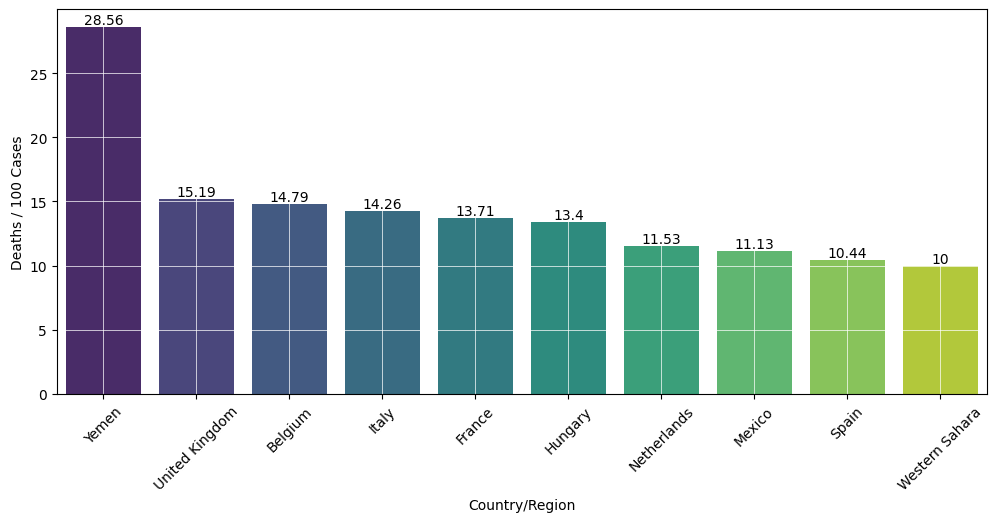

In [40]:
top10_cases_dead = data1.sort_values(['Deaths / 100 Cases'],ascending= False).head(10)

# setting the dimensions of the plot
fig, ax1 = plt.subplots(figsize=(12, 5))
sns.barplot(x='Country/Region',y = 'Deaths / 100 Cases',data = top10_cases_dead,  palette = 'viridis' )
# now simply assign the bar values to each bar by passing containers method

#ensures the x-axis labels are readable.
plt.xticks(rotation=45)

plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='white')


#plt.bar_label(color = 'white')
#ax.bar_label(ax.containers[0])
for i in ax1.containers:
    ax1.bar_label(i,)

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12844\604924173.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




[<BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>]


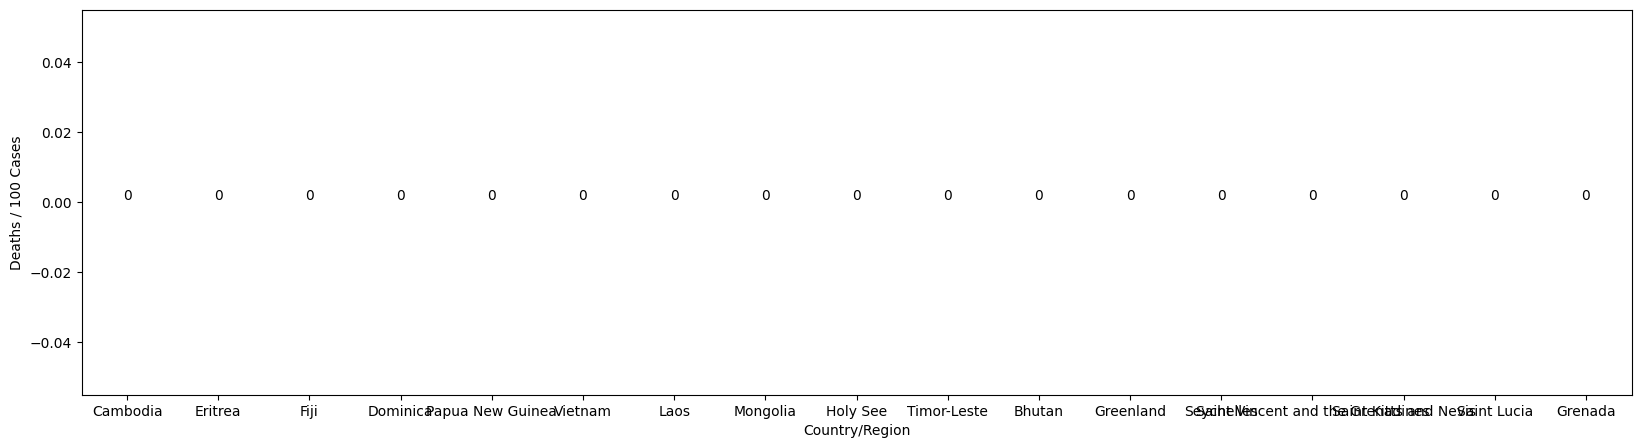

In [41]:
low10_cases_dead = data1.sort_values(['Deaths / 100 Cases'],ascending= False).tail(17)

# setting the dimensions of the plot
fig, ax1 = plt.subplots(figsize=(20, 5))
sns.barplot(x='Country/Region',y = 'Deaths / 100 Cases',data = low10_cases_dead,  palette = 'viridis' )
# now simply assign the bar values to each bar by passing containers method


#ax.bar_label(ax.containers[0])
for i in ax1.containers:
    ax1.bar_label(i,)

print(ax1.containers)  

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12844\3103455642.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




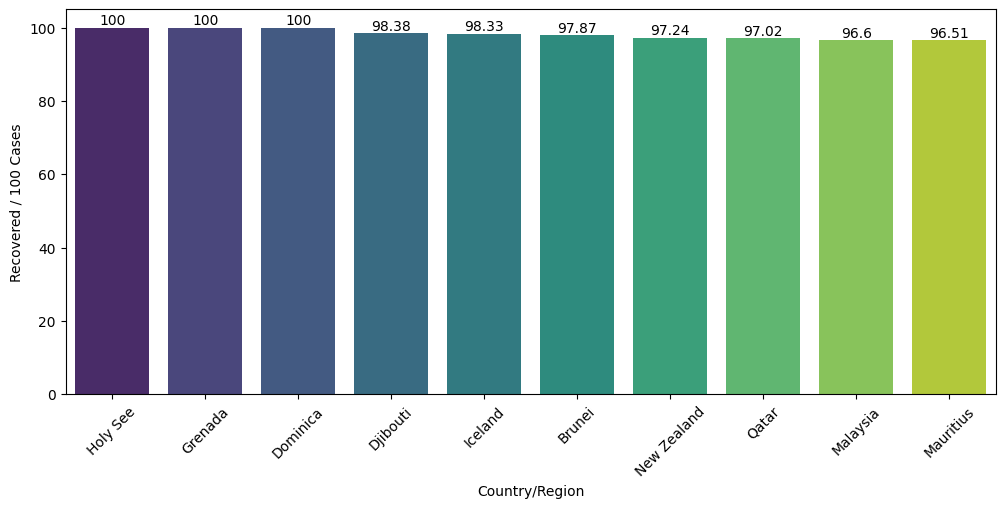

In [42]:
top10_cases_recovered= data1.sort_values(['Recovered / 100 Cases'],ascending= False).head(10)


# setting the dimensions of the plot
fig, ax2 = plt.subplots(figsize=(12, 5))
sns.barplot(x='Country/Region',y = 'Recovered / 100 Cases',data = top10_cases_recovered,  palette = 'viridis' )
# now simply assign the bar values to each bar by passing containers method
plt.xticks(rotation=45)

#ax.bar_label(ax.containers[0])
for i in ax2.containers:
    ax2.bar_label(i,)

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12844\3244093949.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




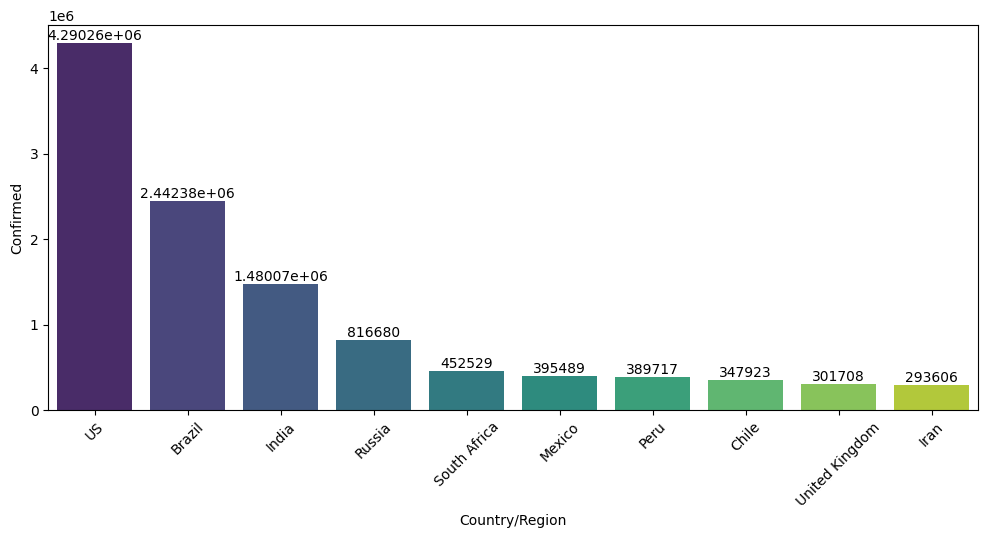

In [43]:
top10_cases_confirmed= data1.sort_values(['Confirmed'],ascending= False).head(10)


# setting the dimensions of the plot
fig, ax3 = plt.subplots(figsize=(12, 5))
sns.barplot(x='Country/Region',y = 'Confirmed',data = top10_cases_confirmed,  palette = 'viridis' )
# now simply assign the bar values to each bar by passing containers method
plt.xticks(rotation=45)

#ax.bar_label(ax.containers[0])
for i in ax3.containers:
    ax3.bar_label(i,)

In [44]:
# Convert the date column to datetime format
data2['Date'] = to_datetime(data2['Date'])


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12844\1189306657.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



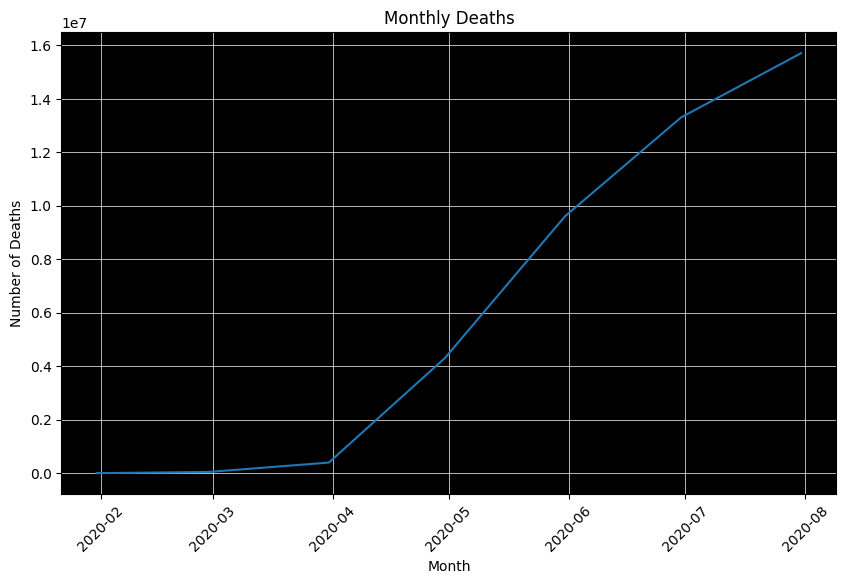

In [45]:
#Group data by month and sum the deaths
monthly_deaths = data2.resample('M', on='Date').sum()['Deaths']

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_deaths.index, y=monthly_deaths.values)

# Setting the background color to black
plt.gca().set_facecolor('black')

# Setting grid lines with color and transparency
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='white')

plt.title('Monthly Deaths')
plt.xlabel('Month')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

# **the Case Fatality Rate (CFR) KPI, When compared with TotalCases**

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12844\4106070576.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



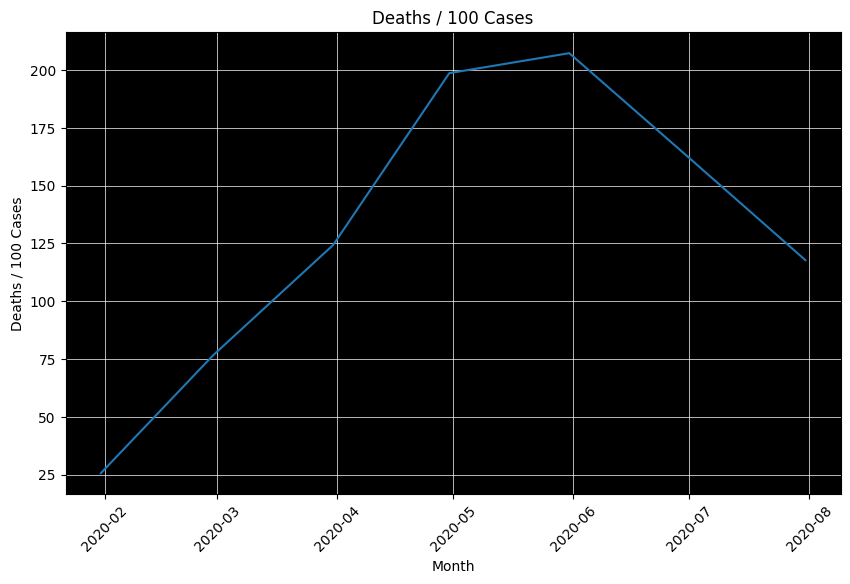

In [46]:
#Group data by month and sum the Deaths_per_100_Cases
monthly_Deaths_per_100_Cases = data2.resample('M', on='Date').sum()['Deaths / 100 Cases']

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_Deaths_per_100_Cases.index, y=monthly_Deaths_per_100_Cases.values)

# Setting the background color to black
plt.gca().set_facecolor('black')

# Setting grid lines with color and transparency
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='white')

plt.title('Deaths / 100 Cases')
plt.xlabel('Month')
plt.ylabel('Deaths / 100 Cases')
plt.xticks(rotation=45)
plt.show()

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12844\2928556986.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



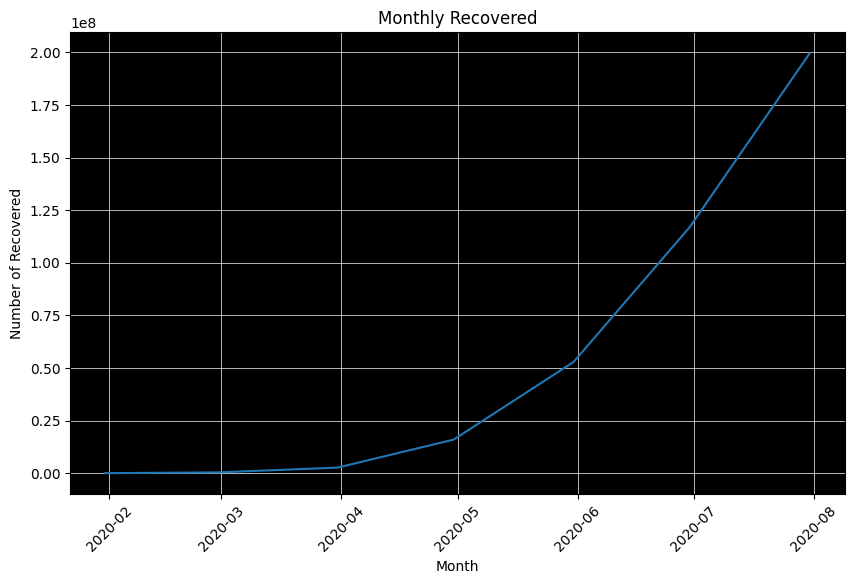

In [47]:
#Group data by month and sum the Recovered
monthly_Recovered = data2.resample('M', on='Date').sum()['Recovered']

plt.figure(figsize=(10, 6))

sns.lineplot(x=monthly_Recovered.index, y=monthly_Recovered.values)

# Setting the background color to black
plt.gca().set_facecolor('black')

# Setting grid lines with color and transparency
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='white')

plt.title('Monthly Recovered')
plt.xlabel('Month')
plt.ylabel('Number of Recovered')
plt.xticks(rotation=45)
plt.show()

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12844\612387288.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



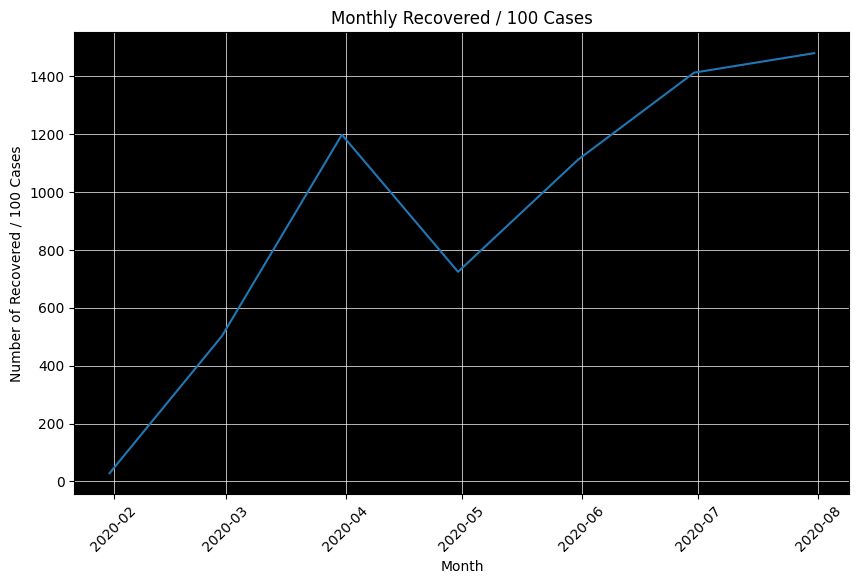

In [48]:
#Group data by month and sum the Recovered
monthly_Recovered_per_100_Cases = data2.resample('M', on='Date').sum()['Recovered / 100 Cases']

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_Recovered_per_100_Cases.index, y=monthly_Recovered_per_100_Cases.values)

# Setting the background color to black
plt.gca().set_facecolor('black')

# Setting grid lines with color and transparency
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='white')

plt.title('Monthly Recovered / 100 Cases')
plt.xlabel('Month')
plt.ylabel('Number of Recovered / 100 Cases')
plt.xticks(rotation=45)
plt.show()

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12844\1899433436.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



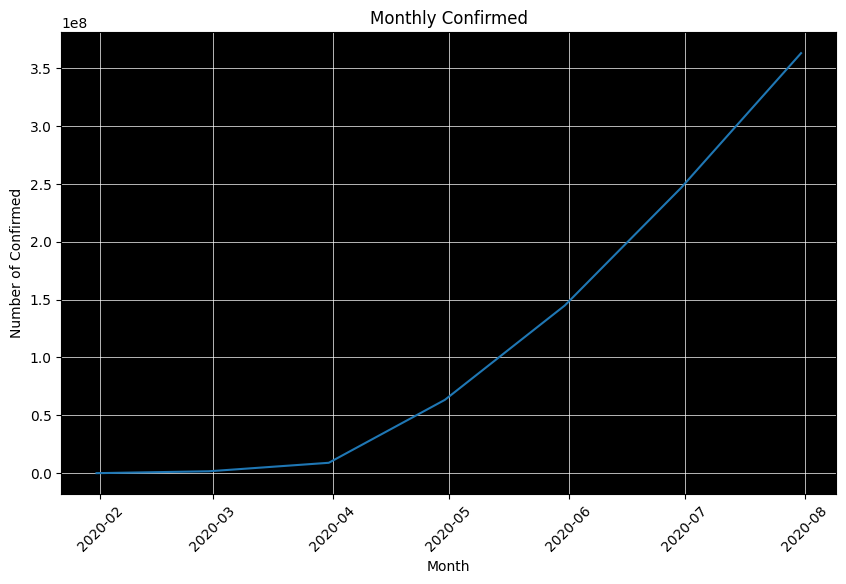

In [49]:
#Group data by month and sum the Confirmed
monthly_Confirmed = data2.resample('M', on='Date').sum()['Confirmed']

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_Confirmed.index, y=monthly_Confirmed.values)

# Setting the background color to black
plt.gca().set_facecolor('black')

# Setting grid lines with color and transparency
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='white')


plt.title('Monthly Confirmed')
plt.xlabel('Month')
plt.ylabel('Number of Confirmed')
plt.xticks(rotation=45)
plt.show()

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12844\3513655038.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




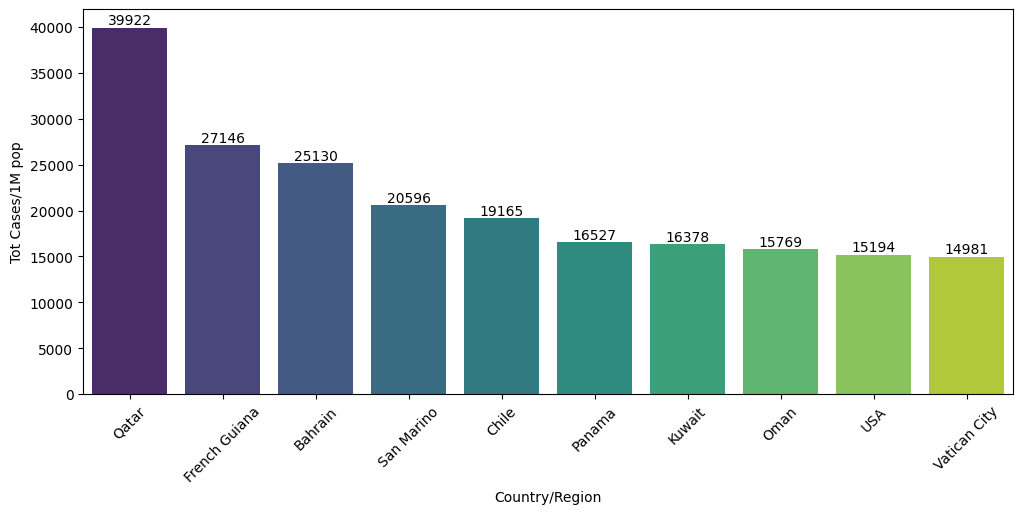

In [50]:
top10_cases= data3_modified.sort_values(['Tot Cases/1M pop'],ascending= False).head(10)


# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='Country/Region',y = 'Tot Cases/1M pop',data = top10_cases,  palette = 'viridis' )
# now simply assign the bar values to each bar by passing containers method
plt.xticks(rotation=45)

#ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,)

In [51]:
# Create a choropleth map for Tot Cases/1M pop
fig_cases = px.choropleth(data3,
                          locations="Country/Region", 
                          locationmode='country names',
                          color="Tot Cases/1M pop",
                          hover_name="Country/Region",
                          color_continuous_scale=px.colors.sequential.Plasma)

fig_cases.update_layout(
    title_text='Total Cases per 1M Population',
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular')
)

fig_cases.show()

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12844\4136164212.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




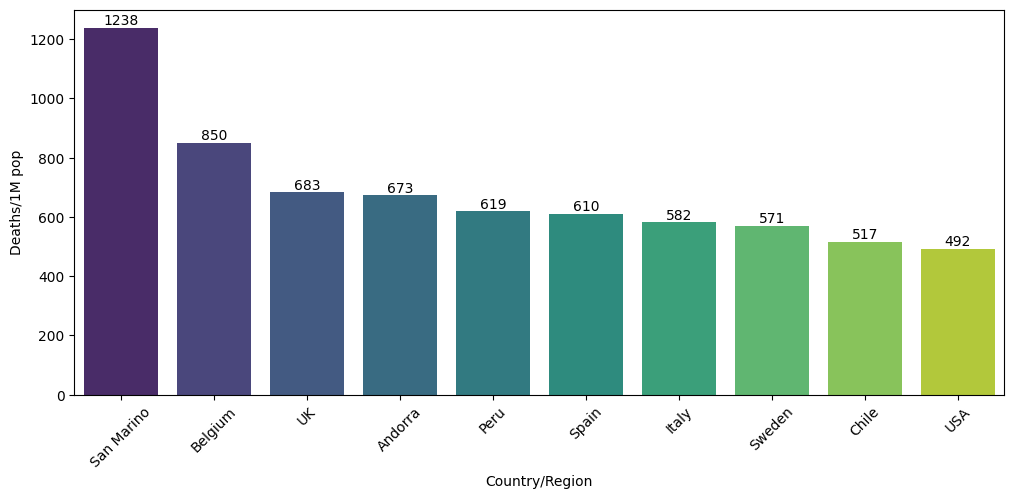

In [52]:
top10_death= data3_modified.sort_values(['Deaths/1M pop'],ascending= False).head(10)


# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='Country/Region',y = 'Deaths/1M pop',data =top10_death,  palette = 'viridis' )
# now simply assign the bar values to each bar by passing containers method
plt.xticks(rotation=45)

#ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,)

In [53]:
# Create a choropleth map for Deaths/1M pop
fig_deaths = px.choropleth(data3,
                           locations="Country/Region", 
                           locationmode='country names',
                           color="Deaths/1M pop",
                           hover_name="Country/Region",
                           color_continuous_scale=px.colors.sequential.Reds)

fig_deaths.update_layout(
    title_text='Deaths per 1M Population',
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular')
)

fig_deaths.show()

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12844\674445605.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




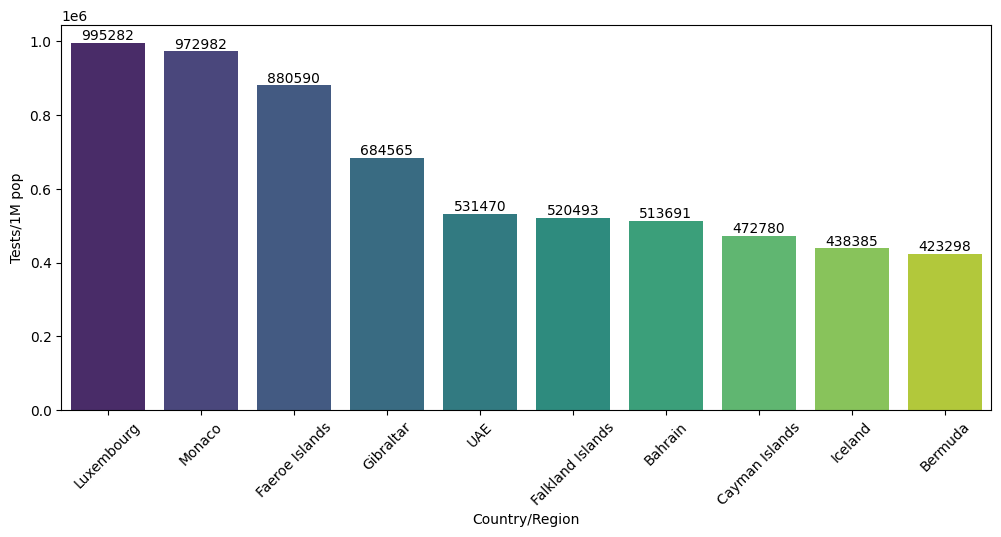

In [54]:
top10_test= data3_modified.sort_values(['Tests/1M pop'],ascending= False).head(10)


# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='Country/Region',y = 'Tests/1M pop',data =top10_test,  palette = 'viridis' )
# now simply assign the bar values to each bar by passing containers method
plt.xticks(rotation=45)

#ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i,)

In [55]:
# Create a choropleth map for TotalTests
fig_tests = px.choropleth(data3,
                          locations="Country/Region", 
                          locationmode='country names',
                          color="TotalTests",
                          hover_name="Country/Region",
                          color_continuous_scale=px.colors.sequential.Blues)

fig_tests.update_layout(
    title_text='Total Tests Conducted',
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular')
)

fig_tests.show()

In [56]:
pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install dash

   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.5 MB 985.5 kB/s eta 0:00:08
   -- ------------------------------------- 0.5/7.5 MB 985.5 kB/s eta 0:00:08
   ---- ----------------------------------- 0.8/7.5 MB 1.0 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/7.5 MB 1.0 MB/s eta 0:00:07
   ------- -------------------------------- 1.3/7.5 MB 1.1 MB/s eta 0:00:06
   -------- ------------------------------- 1.6/7.5 MB 1.1 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/7.5 MB 1.1 MB/s eta 0:00:06
   ----------- ---------------------------- 2.1/7.5 MB 1.1 MB/s eta 0:00:05
   -------------- ------------------------- 2.6/7.5 MB 1.2 MB/s eta 0:00:05
   --------------- ------------------------ 2.9/7.5 MB 1.3 MB/s eta 0:00:04
   ------------------ -------

In [64]:
import plotly.express as px
import plotly.graph_objects as go
import dash
from dash import dcc, html
import dash_html_components as html
from dash.dependencies import Input, Output

In [63]:
pip install --upgrade dash

Note: you may need to restart the kernel to use updated packages.


In [65]:
data3_modified = data3.drop(columns=['NewCases', 'NewDeaths','NewRecovered','Serious,Critical'])

# Create the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("COVID-19 Visualization Dashboard"),
    dcc.Tabs([
        dcc.Tab(label='Top 10 Countries by Deaths/100 Cases', children=[
            dcc.Graph(id='top10-cases-dead')
        ]),
        dcc.Tab(label='COVID-19 Trends', children=[
            dcc.Graph(id='day-wise-trends')
        ]),
        dcc.Tab(label='Country-wise Data', children=[
            dcc.Graph(id='country-wise-data')
        ]),
        dcc.Tab(label='Worldometer Data', children=[
            dcc.Graph(id='worldometer-data')
        ])
    ])
])

# Define the callbacks
@app.callback(
    Output('top10-cases-dead', 'figure'),
    [Input('top10-cases-dead', 'figure')])
def update_top10_cases_dead(figure):
    top10_cases_dead = data1.sort_values(['Deaths / 100 Cases'], ascending=False).head(10)

    fig = px.bar(top10_cases_dead, x='Country/Region', y='Deaths / 100 Cases', color='Deaths / 100 Cases', color_continuous_scale='viridis')
    fig.update_layout(title='Top 10 Countries by Deaths/100 Cases', xaxis_title='Country/Region', yaxis_title='Deaths / 100 Cases')
    return fig

@app.callback(
    Output('day-wise-trends', 'figure'),
    [Input('day-wise-trends', 'figure')])
def update_day_wise_trends(figure):
    fig = px.line(data2, x='Date', y=['Confirmed', 'Deaths', 'Recovered', 'Active'])
    fig.update_layout(title='COVID-19 Trends Over Time', xaxis_title='Date', yaxis_title='Count')
    return fig

@app.callback(
    Output('country-wise-data', 'figure'),
    [Input('country-wise-data', 'figure')])
def update_country_wise_data(figure):
    fig = px.choropleth(data1, locations='Country/Region', color='Confirmed', hover_name='Country/Region', color_continuous_scale='viridis')
    fig.update_layout(title='Country-wise COVID-19 Cases', geo_scope='world')
    return fig

@app.callback(
    Output('worldometer-data', 'figure'),
    [Input('worldometer-data', 'figure')])
def update_worldometer_data(figure):
    fig = px.scatter(data3_modified, x='Tot Cases/1M pop', y='Deaths/1M pop', color='Country/Region', hover_name='Country/Region', size='TotalCases')
    fig.update_layout(title='Worldometer COVID-19 Data', xaxis_title='Total Cases per 1M Population', yaxis_title='Total Deaths per 1M Population')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)